<a href="https://colab.research.google.com/github/JanLeyva/TFM/blob/main/Features_Extraction_Detectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


# Features Extraction Detectron2

In [ ]:
#@title Install dependencies
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 274 kB 6.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=1b661ac642c79c9ffe5f06abb2ab50bb9e38b0c0ce610fdf1ffac580cd95b327
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-x07nrl_7
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-x07nrl_7
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=264364 sha256=74775edd2e4ecc0fcd3727f4ae045e6205df1604624e2e10b85ec22b5ab58cd6
  Stored in directory: /tmp/pip-ephem-wheel-cache-1x5ynr0_/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built p

In [ ]:
#@title Install detectron2
%cd /content/
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2
%cd /content/detectron2
!pip install -r requirements.txt
!python setup.py install
!pip install git+https://github.com/facebookresearch/fvcore.git
"""
%cd /content/
!git clone https://github.com/facebookresearch/iopath
%cd /content/iopath
!python setup.py install

%cd /content/
!git clone https://github.com/WoLpH/portalocker
%cd /content/portalocker
!python setup.py install
"""

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 13917, done.
remote: Total 13917 (delta 0), reused 0 (delta 0), pack-reused 13917
Receiving objects: 100% (13917/13917), 5.70 MiB | 26.77 MiB/s, done.
Resolving deltas: 100% (10050/10050), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
running install
running bdist_egg
running egg_info
creating detectron2.egg-info
writing detectron2.egg-info/PKG-INFO
writing dependency_links to detectron2.egg-info/dependency_links.txt
writing requirements to detectron2.egg-info/requires.txt
writing top-level names to detectron2.egg-info/top_level.txt
writing manifest file 'detectron2.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:381: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not f

'\n%cd /content/\n!git clone https://github.com/facebookresearch/iopath\n%cd /content/iopath\n!python setup.py install\n\n%cd /content/\n!git clone https://github.com/WoLpH/portalocker\n%cd /content/portalocker\n!python setup.py install\n'

In [ ]:
!pip install omegaconf

     |████████████████████████████████| 74 kB 3.1 MB/s 
     |████████████████████████████████| 112 kB 15.8 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=c69e1b3725db02d9281824bd52d64dbdef083ecb3055ce0c62ad41e6bb35951f
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.6 requires black==21.4b2, which is not installed.
detectron2 0.6 requires hydra-core>=1.1, which is not installed.
detectron2 0.6 requires pycocotools>=2.0.2, but you have pycocotools 2.0 which is incompatible.
detectron2 0.6 requires scipy>1.5.1, but you have scipy 1.4.1 which is incompatible.


In [ ]:
#@title Import detectron2

#@markdown You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


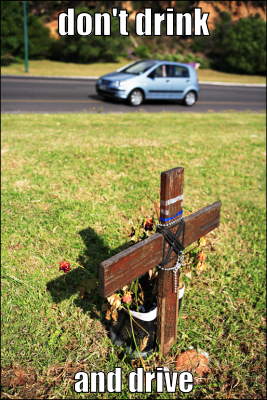

In [ ]:
im = cv2.imread("./drive/My Drive/TFMdataset/img/02536.png")
cv2_imshow(im)

In [ ]:
!wget https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/137257644/model_final_721ade.pkl

--2022-03-20 18:03:51--  https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/137257644/model_final_721ade.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135626669 (129M) [application/octet-stream]
Saving to: ‘model_final_721ade.pkl’

model_final_721ade. 100%[===================>] 129.34M  89.3MB/s    in 1.4s    

2022-03-20 18:03:53 (89.3 MB/s) - ‘model_final_721ade.pkl’ saved [135626669/135626669]



In [ ]:
#@title load model
import iopath
from detectron2.engine import DefaultPredictor
cfg = get_cfg()
cfg.MODEL.WEIGHTS = '/content/model_final_721ade.pkl'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.00  # set the testing threshold for this model
#cfg.DATASETS.TEST = ("my_dataset_val2", )
predictor = DefaultPredictor(cfg)

### Default model

In [ ]:
import iopath
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

{'instances': Instances(num_instances=2, image_height=400, image_width=267, fields=[pred_boxes: Boxes(tensor([[ 96.1907,  58.8343, 199.6281, 106.2430],
        [ 97.6562, 176.0641, 217.4504, 362.1800]], device='cuda:0')), scores: tensor([0.9988, 0.9434], device='cuda:0'), pred_classes: tensor([ 2, 13], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, Fa

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


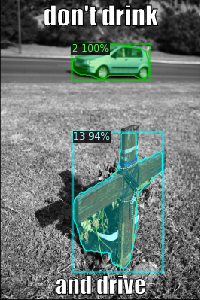

In [ ]:
#@title do detection and display result
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
import cv2
from google.colab.patches import cv2_imshow

#balloon_metadata = MetadataCatalog.get("my_dataset_train2")

# im = cv2.imread("/content/data/test.png")
outputs = predictor(im)
print(outputs)
v = Visualizer(im[:, :, ::-1],
                metadata=None, 
                scale=0.75, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

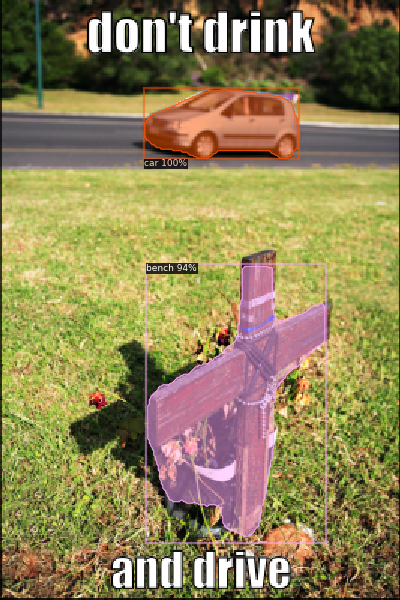

In [ ]:
v1 = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.5)
v1 = v1.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v1.get_image())

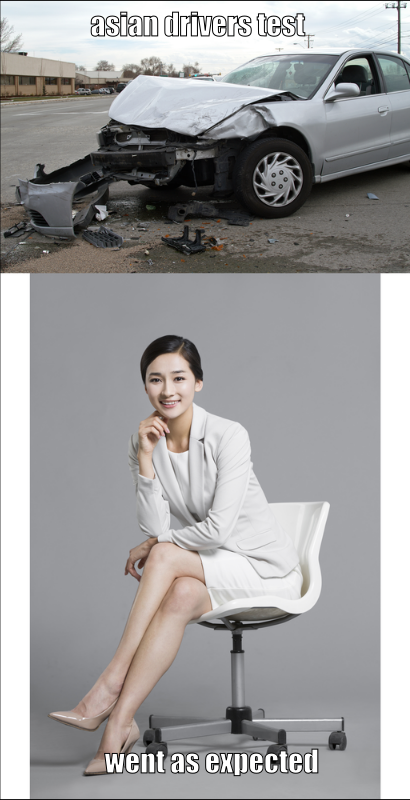

In [ ]:
im2 = cv2.imread("./drive/My Drive/TFMdataset/img/02674.png")
cv2_imshow(im2)

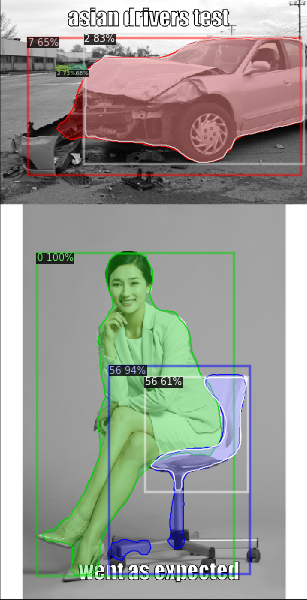

In [ ]:
outputs2 = predictor(im2)
#print(outputs)
v2 = Visualizer(im2[:, :, ::-1],
                metadata=None, 
                scale=0.75, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
v2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
cv2_imshow(v2.get_image()[:, :, ::-1])

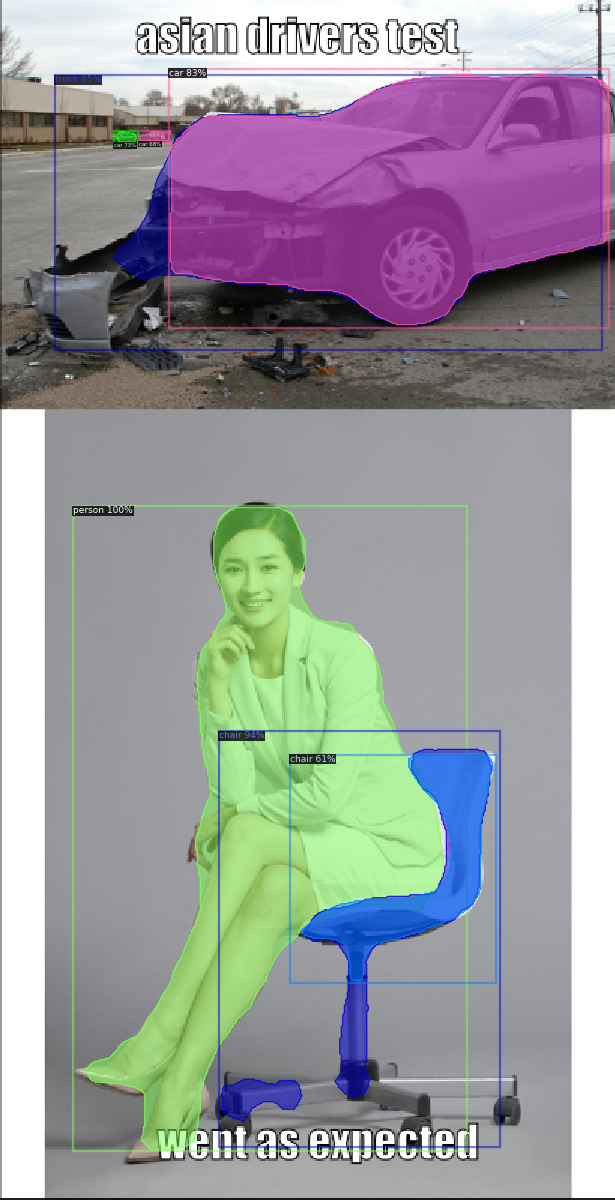

In [ ]:
v3 = Visualizer(im2, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.5)
v3 = v3.draw_instance_predictions(outputs2["instances"].to("cpu"))
cv2_imshow(v3.get_image())

In [ ]:
outputs2["instances"].to("cpu")

Instances(num_instances=7, image_height=800, image_width=410, fields=[pred_boxes: Boxes(tensor([[ 48.7958, 337.6598, 311.3391, 767.5944],
        [145.7520, 487.6085, 333.0868, 764.8578],
        [112.6355,  45.8105, 405.9063, 218.4255],
        [ 75.8006,  87.5267,  91.7335,  95.2883],
        [ 92.6978,  87.2890, 113.5227,  94.4925],
        [ 36.7262,  50.1581, 401.3727, 233.5374],
        [193.3275, 503.0629, 330.9093, 655.5466]])), scores: tensor([0.9991, 0.9396, 0.8308, 0.7307, 0.6805, 0.6453, 0.6130]), pred_classes: tensor([ 0, 56,  2,  2,  2,  7, 56]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, 

In [ ]:
type(outputs2['instances'])

detectron2.structures.instances.Instances

In [ ]:
type(outputs2)

dict

# VQA

In [ ]:
# Install required packages
!pip install -U git+https://github.com/facebookresearch/fvcore
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git@ffff8ac'

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-uga34d7i
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-uga34d7i
  Cloning https://github.com/facebookresearch/detectron2.git (to revision ffff8ac) to /tmp/pip-req-build-wt8yafzg
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-wt8yafzg
  Running command git checkout -q ffff8ac
  Created wheel for detectron2: filename=detectron2-0.1.1-cp37-cp37m-linux_x86_64.whl size=5471803 sha256=e6f074d26971a2fe8e63ad9e93d51d35efd351ec61e36e2ceb30d1d59110a900
  Stored in directory: /tmp/pip-ephem-wheel-cache-txw7u2c8/wheels/dc/67/5e/97cd87473c05a19fa8191b6bf167c256bdc27ec7ff6f7940f2
Successfully built detectron2
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6


In [ ]:
!git clone https://github.com/vedanuj/grid-feats-vqa.git --branch region_features

Cloning into 'grid-feats-vqa'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 102 (delta 61), reused 75 (delta 35), pack-reused 0
Receiving objects: 100% (102/102), 36.21 KiB | 7.24 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
!cd grid-feats-vqa/

/bin/bash: line 0: cd: grid-feats-vqa/: No such file or directory


In [ ]:
!python extract_region_feature.py \
              --config-file configs/X-152-region-c4.yaml \
              --dataset "hateful_memes" \
              --dataset-path "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/" \

usage: extract_region_feature.py [-h] [--config-file FILE]
                                 [--dataset {coco_2014_train,coco_2014_val,coco_2015_test}]
                                 [--dataset-path DATASET_PATH]
                                 [--feature-name {fc6,fc7}]
                                 ...
extract_region_feature.py: error: argument --dataset: invalid choice: 'hateful_memes' (choose from 'coco_2014_train', 'coco_2014_val', 'coco_2015_test')


* Desde https://gitlab.com/vedanuj/vqa-maskrcnn-benchmark
  - Despres utilitza la funció `extract_features_vmb.py` de *mmf* 

In [ ]:
import os
os.chdir(home)
!git clone https://gitlab.com/vedanuj/vqa-maskrcnn-benchmark

In [ ]:
!pip install ninja yacs cython matplotlib

In [ ]:
os.chdir(os.path.join(home, "vqa-maskrcnn-benchmark"))
!rm -rf build
!python setup.py build develop

In [ ]:
# !wget https://dl.fbaipublicfiles.com/pythia/detectron_model/FAST_RCNN_MLP_DIM2048_FPN_DIM512.pkl
# !wget https://dl.fbaipublicfiles.com/pythia/detectron_model/e2e_faster_rcnn_X-101-64x4d-FPN_1x_MLP_2048_FPN_512.yaml

os.chdir(os.path.join(home, "mmf/tools/scripts/features/"))
out_folder = os.path.join(home, "features/")

!python extract_features_vmb.py --config_file "https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model_x152.yaml" \
                                --model_name "X-152" \
                                --output_folder $out_folder \
                                --image_dir "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/" \
                                --num_features 100 \
                                # --exclude_list "/content/exclude.txt"
                                # --feature_name "fc6" \
                                # --confidence_threshold 0. \